In [1]:
sys.path.append('../')

%load_ext autoreload
%autoreload 2

import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pandas as pd
import seaborn as sns

from IPython.display import Image, display

sns.set()

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
paper_folder = '../../paper_content_ext/'

result_root = '../../results/baseline_ext/'
subset = 'subset_100.0'
results = {}
paths = glob.glob(result_root + '**/**/' + subset)
for p in paths:
    results[p.split('/')[-3]] = p

In [32]:
acc_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Modified_Accuracies_Matrix.png')))
    with open(os.path.join(results[dataset], 'Modified_Accuracies_Matrix.txt'), 'r') as f:
        if dataset == 'anomaly_new':
            dataset = 'Anomaly'
        if dataset == 'Crop' or dataset == 'PhalangesOutlinesCorrect':
            continue
        acc_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

AsphaltPavementType
AsphaltRegularity
Crop
ElectricDevices
HandOutlines
MedicalImages
MelbournePedestrian
NonInvasiveFetalECGThorax1
PhalangesOutlinesCorrect
Strawberry
Wafer


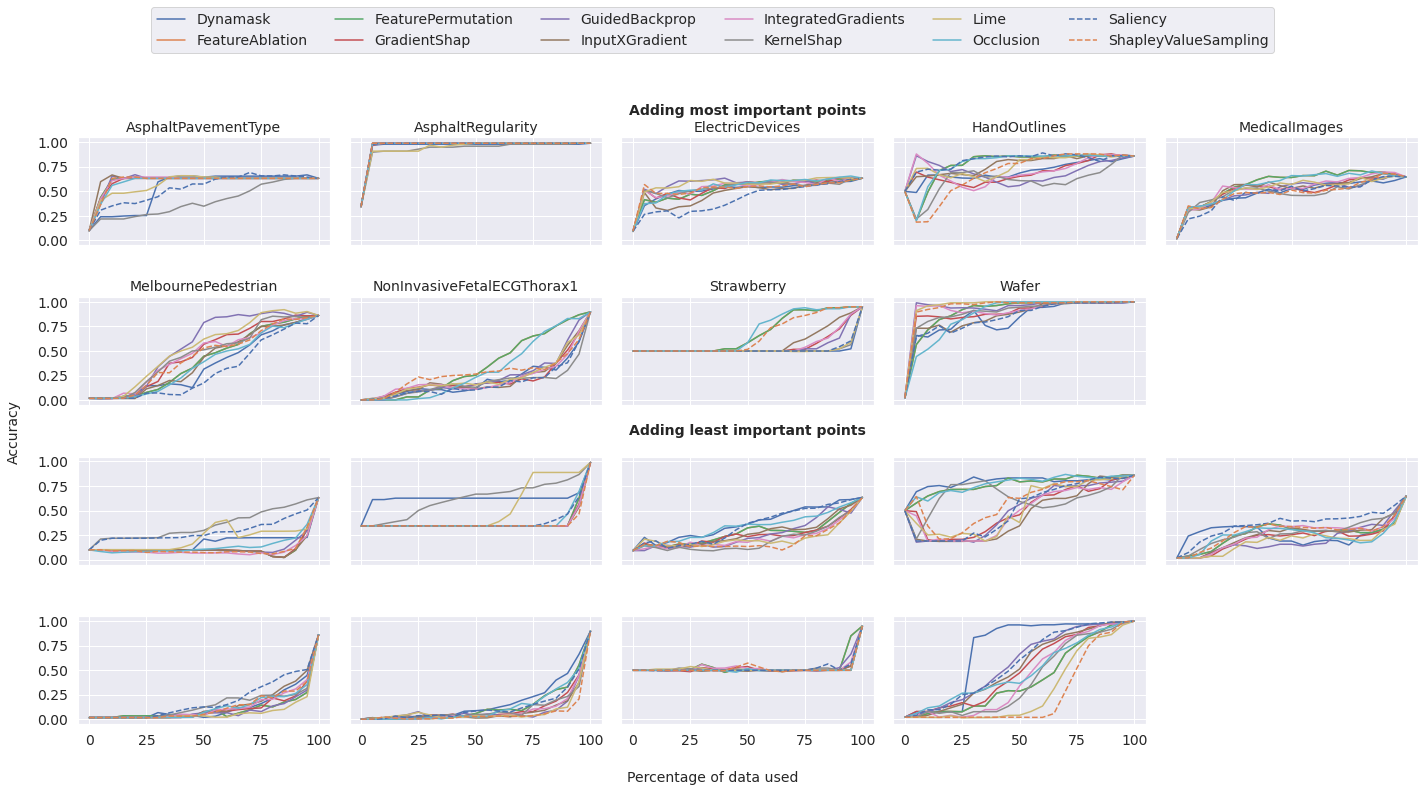

In [42]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=4, ncols=5, sharex=True, sharey=True)
axes = ax.flat
for di, d in enumerate(sorted(acc_values)):
    axes[di].set_title(d)
    for mi, m in enumerate(sorted(acc_values[d]['larger']['accs'])):
        if di == 0:
            axes[di].plot(acc_values[d]['larger']['percs'], acc_values[d]['larger']['accs'][m], linestyle='solid' if mi < 10 else 'dashed', label=m)
        else:
            axes[di].plot(acc_values[d]['larger']['percs'], acc_values[d]['larger']['accs'][m], linestyle='solid' if mi < 10 else 'dashed')
        axes[di+2*5].plot(acc_values[d]['smaller']['percs'], acc_values[d]['smaller']['accs'][m], linestyle='solid' if mi < 10 else 'dashed')
    
        #axes[di].set_xticks(np.linspace(0, 100, 5))
        #axes[di+6].set_xticks(np.linspace(0, 100, 5))

axes[9].set_visible(False)
axes[19].set_visible(False)

fig.supxlabel('Percentage of data used')
fig.supylabel('Accuracy', x=0.01)
fig.legend(loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=6)

plt.xticks(np.linspace(0, 100, 5))
plt.yticks(np.linspace(0, 1, 5))

def create_subtitle(fig, grid, title):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    row.set_title(f'{title}\n', fontweight='semibold')
    row.set_frame_on(False)
    row.axis('off')

grid = plt.GridSpec(4, 5)
create_subtitle(fig, grid[0, ::], 'Adding most important points')
create_subtitle(fig, grid[2, ::], 'Adding least important points')

plt.tight_layout()
fname = os.path.join(paper_folder, 'Appendix_Accuracy_drops.png')
fig.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [13]:
agree_values = {}
for dataset in sorted(results):
    print(dataset)
    #display(Image(os.path.join(results[dataset], 'Modified_Agreement_Matrix.png')))
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    if dataset == 'Crop' or dataset == 'PhalangesOutlinesCorrect':
        continue
    agree_values[dataset] = {}
    setting = 'Modified_Agreement_Matrix.txt'
    with open(os.path.join(results[dataset_real], setting), 'r') as f:
        agree_values[dataset] = json.loads(str(f.readline().replace('\'', '\"')[1:-1]))

AsphaltPavementType
AsphaltRegularity
Crop
ElectricDevices
HandOutlines
MedicalImages
MelbournePedestrian
NonInvasiveFetalECGThorax1
PhalangesOutlinesCorrect
Strawberry
Wafer


In [14]:
tab_str = 'Method & '
for d in sorted(agree_values):
    tab_str = tab_str + d + ' & '
tab_str = tab_str[:-2] + '\\\\\n'
for agree in sorted(agree_values):
    for a in agree_values[d]['larger']['agree']:
        tab_str = tab_str + ' & ' + '${:.0f}$'.format(a)
tab_str = tab_str + ' \\\\\n'
for m in sorted(agree_values[d]['larger']['ratios']):
    tab_str = tab_str + m + ' & '
    for d in sorted(agree_values):
        for v in agree_values[d]['larger']['ratios'][m]:
            tab_str = tab_str + '${:.0f}$'.format(v) + ' & '
    tab_str = tab_str[:-2] + '\\\\\n'
print(tab_str)

Method & AsphaltPavementType & AsphaltRegularity & ElectricDevices & HandOutlines & MedicalImages & MelbournePedestrian & NonInvasiveFetalECGThorax1 & Strawberry & Wafer \\
 & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ & $90$ & $95$ & $100$ \\
Dynamask & $30$ & $35$ & $100$ & $1$ & $1$ & $100$ & $99$ & $100$ & $100$ & $89$ & $99$ & $100$ & $100$ & $100$ & $100$ & $100$ & $100$ & $100$ & $100$ & $100$ & $100$ & $99$ & $100$ & $100$ & $30$ & $62$ & $100$ \\
FeatureAblation & $10$ & $11$ & $22$ & $1$ & $1$ & $9$ & $56$ & $64$ & $98$ & $31$ & $46$ & $68$ & $75$ & $85$ & $99$ & $84$ & $92$ & $100$ & $91$ & $93$ & $99$ & $67$ & $70$ & $92$ & $22$ & $29$ & $60$ \\
FeaturePermutation & $10$ & $11$ & $22$ & $1$ & $1$ & $9$ & $56$ & $64$ & $98$ & $31$ & $46$ & $68$ & $75$ & $85$ & $99$ & $84$ & $92$ & $100$ & $91$ & $93$ & $99$ & $67$ & $70$ & $92$ & $22$ & $29$ & $6

In [15]:
import pickle
base_accs = {}
for dataset in sorted(results):
    print(dataset)
    dataset_real = dataset
    if dataset == 'anomaly_new':
        dataset = 'Anomaly'
    if dataset == 'Crop' or dataset == 'PhalangesOutlinesCorrect':
        continue
    base_accs[dataset] = {}
    setting_base = 'AlexNet_batch-32_run-0_report.pickle'
    setting_subset = 'acc_report.pickle'
    with open(os.path.join(result_root, dataset_real, setting_base), 'rb') as f:
        base_accs[dataset] = {'base': pickle.load(f)['weighted avg']['f1-score'], 'subset': None}
    with open(os.path.join(results[dataset_real], setting_subset), 'rb') as f:
        base_accs[dataset]['subset'] = pickle.load(f)['weighted avg']['f1-score']

AsphaltPavementType
AsphaltRegularity
Crop
ElectricDevices
HandOutlines
MedicalImages
MelbournePedestrian
NonInvasiveFetalECGThorax1
PhalangesOutlinesCorrect
Strawberry
Wafer


In [16]:
tab_str = 'Dataset & Test & Attr. Subset \\\\\n'
for d in sorted(base_accs):
    tab_str = tab_str + d + ' & ${:.4f}$ & ${:.4f}$ \\\\\n'.format(base_accs[d]['base'], base_accs[d]['subset'])
print(tab_str)

Dataset & Test & Attr. Subset \\
AsphaltPavementType & $0.6358$ & $0.6326$ \\
AsphaltRegularity & $0.9573$ & $0.9900$ \\
ElectricDevices & $0.6363$ & $0.6340$ \\
HandOutlines & $0.9183$ & $0.8591$ \\
MedicalImages & $0.7342$ & $0.6471$ \\
MelbournePedestrian & $0.8749$ & $0.8612$ \\
NonInvasiveFetalECGThorax1 & $0.9049$ & $0.8984$ \\
Strawberry & $0.9596$ & $0.9501$ \\
Wafer & $0.9900$ & $1.0000$ \\

